Om Patel
(20BCP036)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('./Dataset/Re_Car_Purchasing_Data.csv',encoding='ISO-8859-1')
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


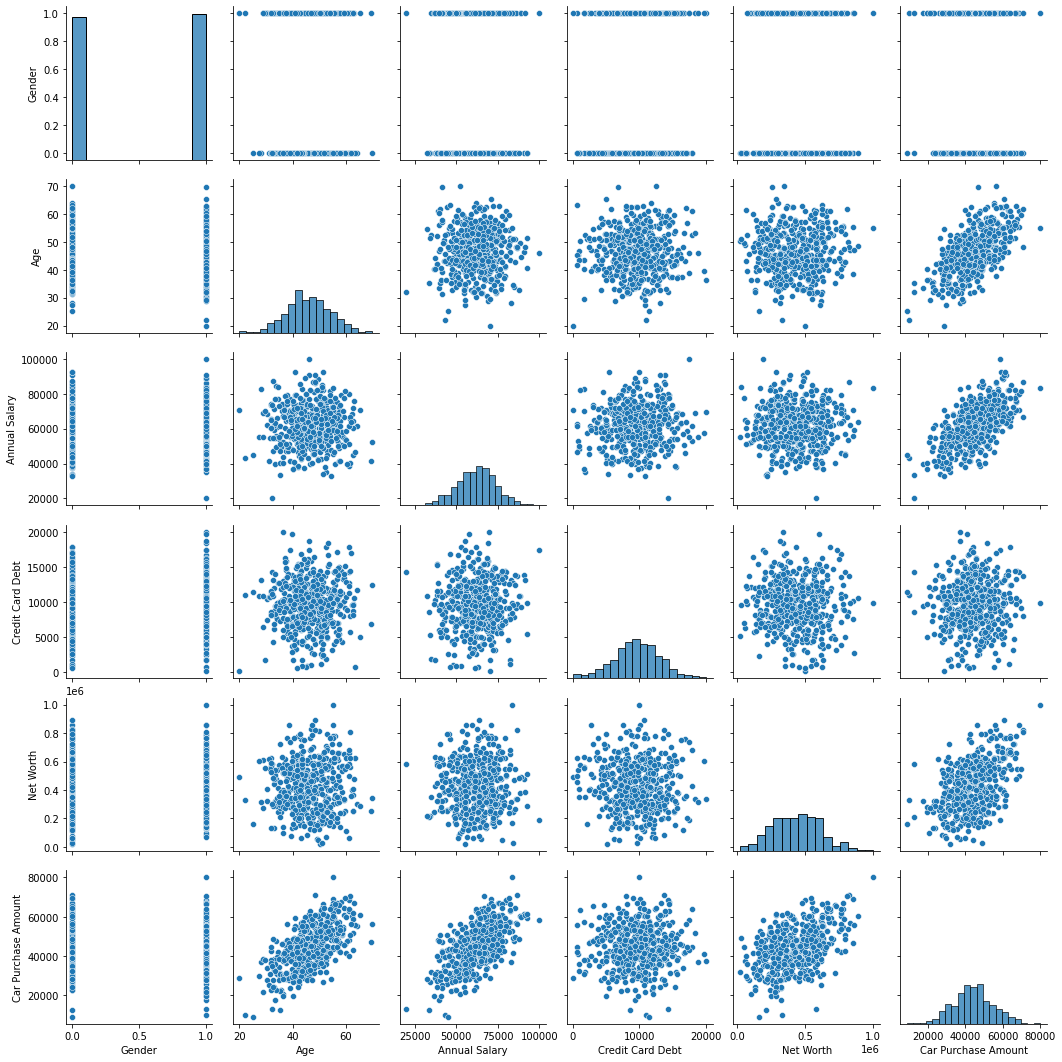

In [3]:
sns.pairplot(data)

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Country']=le.fit_transform(data['Country'])
data

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,27,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,17,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,1,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,41,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,26,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,128,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,208,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,144,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,24,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [5]:
x=data.drop(['Customer Name','Customer e-mail','Car Purchase Amount'],axis=1)
y=data['Car Purchase Amount']
print(x)
print(y)

     Country  Gender        Age  Annual Salary  Credit Card Debt    Net Worth
0         27       0  41.851720    62812.09301      11609.380910  238961.2505
1         17       0  40.870623    66646.89292       9572.957136  530973.9078
2          1       1  43.152897    53798.55112      11160.355060  638467.1773
3         41       1  58.271369    79370.03798      14426.164850  548599.0524
4         26       1  57.313749    59729.15130       5358.712177  560304.0671
..       ...     ...        ...            ...               ...          ...
495      128       0  41.462515    71942.40291       6995.902524  541670.1016
496      208       1  37.642000    56039.49793      12301.456790  360419.0988
497      144       1  53.943497    68888.77805      10611.606860  764531.3203
498       24       1  59.160509    49811.99062      14013.034510  337826.6382
499      209       1  46.731152    61370.67766       9391.341628  462946.4924

[500 rows x 6 columns]
0      35321.45877
1      45115.52566
2 

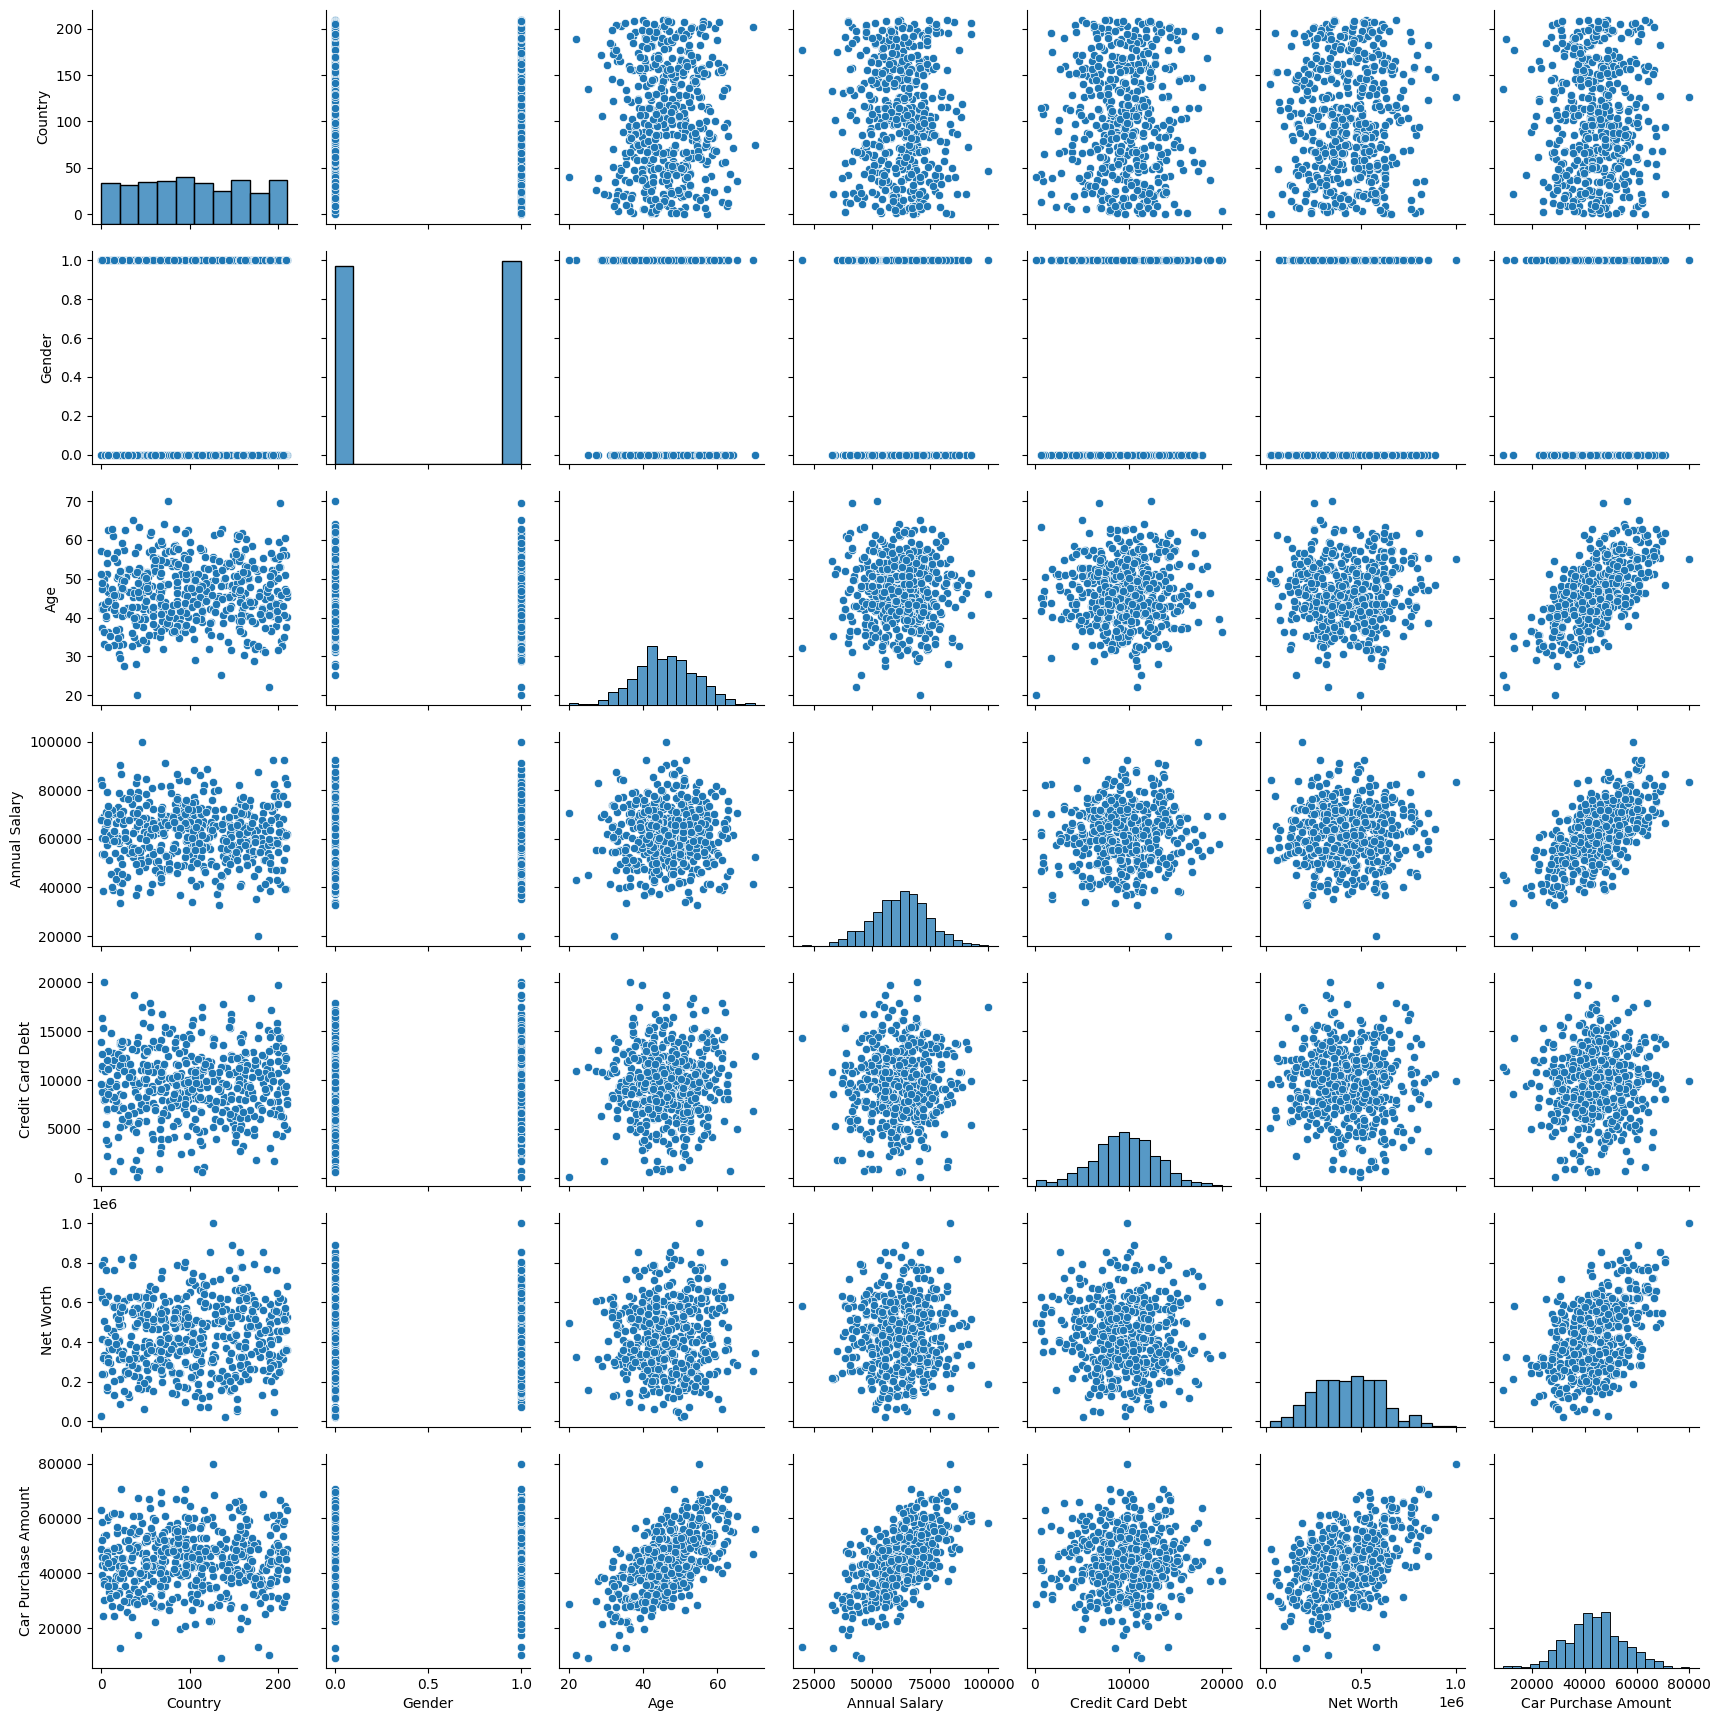

In [6]:
sns.pairplot(data)

Without Normalization

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [9]:
model=Sequential()
model.add(Dense(6,activation='relu',input_dim=6))
model.add(Dense(20,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=[r2_score],run_eagerly=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 20)                140       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 843
Trainable params: 843
Non-trainable params: 0
_________________________________________________________________


In [10]:
hist=model.fit(xtrain,ytrain,batch_size=32,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 7s 107ms/step - loss: 3412313344.0000 - r2_score: -32.4783 - val_loss: 1421003904.0000 - val_r2_score: -8.9482
Epoch 2/100
10/10 [==============================] - 1s 75ms/step - loss: 924323264.0000 - r2_score: -7.4689 - val_loss: 274530176.0000 - val_r2_score: -0.9626
Epoch 3/100
10/10 [==============================] - 1s 129ms/step - loss: 230144896.0000 - r2_score: -1.5830 - val_loss: 170648944.0000 - val_r2_score: -0.4579
Epoch 4/100
10/10 [==============================] - 2s 164ms/step - loss: 156525568.0000 - r2_score: -0.4663 - val_loss: 101718024.0000 - val_r2_score: 0.1340
Epoch 5/100
10/10 [==============================] - 2s 185ms/step - loss: 107187272.0000 - r2_score: -0.0619 - val_loss: 64848604.0000 - val_r2_score: 0.4498
Epoch 6/100
10/10 [==============================] - 2s 151ms/step - loss: 74337944.0000 - r2_score: 0.2113 - val_loss: 53599732.0000 - val_r2_score: 0.4994
Epoch 7/100
10/10 [====================

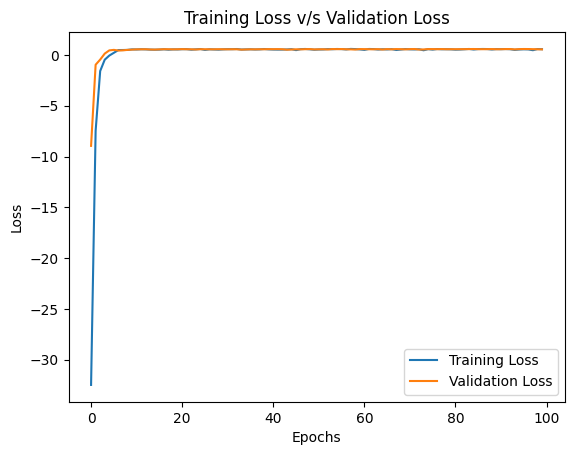

In [11]:
plt.plot(hist.history['r2_score'],label='Training Loss')
plt.plot(hist.history['val_r2_score'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss v/s Validation Loss')
plt.legend()

In [12]:
ypred=model.predict(xtest)

4/4 [==============================] - 0s 6ms/step


In [13]:
r2_score(ytest,ypred)

0.5871490516086507

Applying Normalization

In [14]:
from sklearn.preprocessing import StandardScaler
sca=StandardScaler()
xnor=sca.fit_transform(x)
xnor

array([[-1.25451191, -1.01207287, -0.55074911,  0.05857619,  0.57427133,
        -1.11046945],
       [-1.42027285, -1.01207287, -0.67383422,  0.38657041, -0.0099515 ,
         0.57392937],
       [-1.68549034,  0.98807114, -0.38750768, -0.71236095,  0.4454518 ,
         1.19397625],
       ...,
       [ 0.68489103,  0.98807114,  0.96624515,  0.57832106,  0.28802326,
         1.92114437],
       [-1.30424019,  0.98807114,  1.62075409, -1.05333541,  1.26384749,
        -0.54019026],
       [ 1.76233711,  0.98807114,  0.06140832, -0.06470949, -0.06205457,
         0.18153098]])

In [15]:
from sklearn.model_selection import train_test_split
xtrainnor,xtestnor,ytrainnor,ytestnor=train_test_split(xnor,y,random_state=0)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

In [17]:
modelnor=Sequential()
modelnor.add(Dense(6,activation='relu',input_dim=6))
modelnor.add(Dense(20,activation='relu'))
modelnor.add(Dense(30,activation='relu'))
modelnor.add(Dense(1,activation='linear'))
modelnor.compile(loss='mean_squared_error',optimizer='adam',metrics=[r2_score],run_eagerly=True)
modelnor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 20)                140       
                                                                 
 dense_6 (Dense)             (None, 30)                630       
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 843
Trainable params: 843
Non-trainable params: 0
_________________________________________________________________


In [18]:
histnor=modelnor.fit(xtrain,ytrain,batch_size=32,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 176ms/step - loss: 4018400512.0000 - r2_score: -41.5753 - val_loss: 2160970752.0000 - val_r2_score: -16.3393
Epoch 2/100
10/10 [==============================] - 2s 161ms/step - loss: 1232596096.0000 - r2_score: -11.4145 - val_loss: 586592448.0000 - val_r2_score: -3.9514
Epoch 3/100
10/10 [==============================] - 2s 207ms/step - loss: 325594016.0000 - r2_score: -2.1528 - val_loss: 247933248.0000 - val_r2_score: -0.9848
Epoch 4/100
10/10 [==============================] - 2s 198ms/step - loss: 263609136.0000 - r2_score: -1.4864 - val_loss: 264195488.0000 - val_r2_score: -1.0059
Epoch 5/100
10/10 [==============================] - 2s 172ms/step - loss: 265763936.0000 - r2_score: -1.5269 - val_loss: 242053696.0000 - val_r2_score: -0.9172
Epoch 6/100
10/10 [==============================] - 2s 163ms/step - loss: 229411520.0000 - r2_score: -1.2197 - val_loss: 239141376.0000 - val_r2_score: -0.9810
Epoch 7/100
10/10 [=========

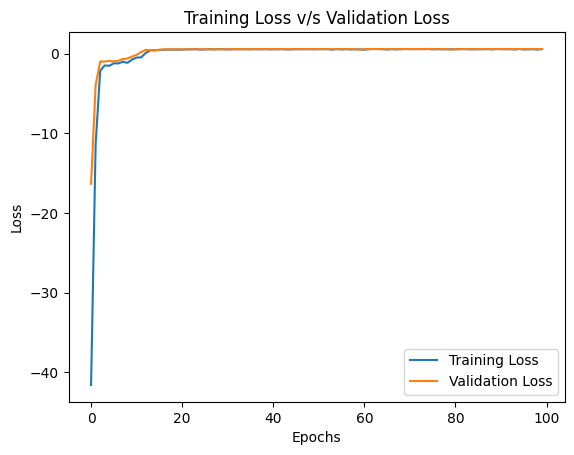

In [19]:
plt.plot(histnor.history['r2_score'],label='Training Loss')
plt.plot(histnor.history['val_r2_score'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss v/s Validation Loss')
plt.legend()

In [20]:
yprednor=modelnor.predict(xtestnor)

4/4 [==============================] - 0s 6ms/step


In [21]:
r2_score(ytestnor,yprednor)

-17.402943646260223